# K-means

```{admonition} Important terms
:class: dropdown
**Centroid**
: The center points of clusters in a dataset. In other words, it is the mean coordinates of the data points within each cluster. The algorithm iteratively adjusts centroids to minimize the distance between data points and their assigned centroid.

**Convergence**
: The state where Cluster Centers stabilize, indicating the completion of the K-Means algorithm.

**Random Initialization Trap**
: The situation where the initial random selection of cluster centroids in K-Means may lead to undesirable outcomes, such as forming clusters with only a few points.

**Clustering Score (Distortion)**
: The sum of squared distances of samples to their closest cluster center, used as a metric for evaluating the quality of clustering.

## Introduction

Perhaps one of the most popular clustering methods is the K-means method. K-means is often referred to as Lloyd’s algorithm.

```{admonition} The uses of K-means
:class: tip, dropdown
The uses of K-means include:
* Search engine: Search engine, groups results together using clustering algorithm
* Customer segmentation: K-means clustering can be used to create customer clusters based on demographic information, geographical information and behavioral data
* Social network analysis: To find groups of people with specific interest to direct the personalized ads
* Data center: To organize the computer clusters in data center
* Inventory management: Create inventory clusters based on sales number and manufacturing capacity
```



The main idea of the method is the iterative repetition of two steps:

1. **distribution of sample objects into clusters;**

2. **recalculation of cluster centers.**

![kmeans](assets/kmeans.gif)

## How K-Means works

**Initialization**

Start by randomly choosing K cluster centers denoted as $\mu^0 = (\mu_{1}^0, . . . , \mu_{k}^0)$.

**Assignment Step**

For each data point $x_j$ (indexed from 1 to $m$), find the closest cluster center using:

$$
    z^j = \arg \min_{i} x_{j} − µ_{i}^t||_{2}^2,
$$

- $\mu_{i}^t$: Current centroid of cluster $i$.
- $x_{j} − µ_{i}^t||_{2}^2$: Euclidean distance squared between data point $x_j$ and centroid $\mu{i}^t$.

**Move Centroid Step**

Recalculate cluster centers using:

$$
    µ_{i}^{t+1} = \arg \min_{µ} \sum\limits_{j:z^j=i}||x_{j} − µ||_{2}^2.
$$

- $\mu_{i}^{t+1}$: Updated centroid for cluster $i$.
- $\sum\limits_{j:z^j=i}||x_{j} − \mu||_{2}^2$: Total squared distance between data points in cluster $i$ and centroid $\mu$.

**Iteration**

Repeat the Assignment and Move Centroid steps until convergence.

**Convergence**

The algorithm converges when the cluster centers no longer significantly change.

**Result**

Data points are now grouped into K clusters, and the cluster centers represent the center of each cluster.

```{figure} assets/Inner_Working_K_Means.jpg
:name: kmeans

K-means scheme
```

## Initial Center Selection

When choosing initial centers for K-means clustering, two key challenges arise: avoiding regions with no data points and preventing crowded center placement. To address these, consider:

**Random Selection:** Choose the first center randomly from data points. Subsequent centers are randomly selected with a probability proportional to the square of their distance from the nearest existing center.

```{note}
K-means++ is an enhanced version of K-means clustering that addresses issues with initial center selection. Instead of purely random initialization, K-means++ ensures more strategic choices. The first center is selected randomly, and subsequent centers are chosen with a probability proportional to the square of their distance from the nearest existing center. This modification often leads to faster convergence and improved final clustering results.
```

<div style="display:none" id="q_KMeans_PlusPlus">W3sicXVlc3Rpb24iOiAiV2hhdCBwcm9ibGVtIGRvZXMgdGhlIEstbWVhbnMrKyBtb2RpZmljYXRpb24gYWltIHRvIGFkZHJlc3M/IiwgInR5cGUiOiAibXVsdGlwbGVfY2hvaWNlIiwgImFuc3dlcnMiOiBbeyJhbnN3ZXIiOiAiQ29udmVyZ2VuY2UgaXNzdWVzIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIkluY29ycmVjdC4gSy1tZWFucysrIGlzIG5vdCBkZXNpZ25lZCB0byBjb252ZXJnZW5jZSBpc3N1ZXMuIn0sIHsiYW5zd2VyIjogIlJhbmRvbSBpbml0aWFsaXphdGlvbiB0cmFwIiwgImNvcnJlY3QiOiB0cnVlLCAiZmVlZGJhY2siOiAiQ29ycmVjdCEgSy1tZWFucysrIGFpbXMgdG8gYXZvaWQgdGhlIGlzc3VlcyBhc3NvY2lhdGVkIHdpdGggcmFuZG9tIGluaXRpYWxpemF0aW9uLiJ9LCB7ImFuc3dlciI6ICJFbGJvdyBtZXRob2QgbGltaXRhdGlvbnMiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiSW5jb3JyZWN0LiBLLW1lYW5zKysgaXMgbm90IHNwZWNpZmljYWxseSBhZGRyZXNzaW5nIGxpbWl0YXRpb25zIG9mIHRoZSBlbGJvdyBtZXRob2QuIn0sIHsiYW5zd2VyIjogIk1pbmktYmF0Y2ggcHJvY2Vzc2luZyBjaGFsbGVuZ2VzIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIkluY29ycmVjdC4gSy1tZWFucysrIGlzIG5vdCByZWxhdGVkIHRvIGNoYWxsZW5nZXMgaW4gbWluaS1iYXRjaCBwcm9jZXNzaW5nLiJ9XX1d</div>

In [30]:
from jupyterquiz import display_quiz
display_quiz("#q_KMeans_PlusPlus")

<IPython.core.display.Javascript object>

<div style="display:none" id="q_ex">W3sicXVlc3Rpb24iOiAiR2l2ZW4gdGhlIHNldCBvZiBwb2ludHMgaW4gb25lLWRpbWVuc2lvbmFsIHNwYWNlOiAkeF8xID0gLTEsIHhfMiA9IDAsIHhfMyA9IDEsIHhfNCA9IDgsIHhfNSA9IDksIHhfNiA9IDEwJCwgYW5kIGFzc3VtaW5nICRLPTIkLCB3aXRoIGluaXRpYWwgY2x1c3RlciBjZW50ZXJzICRjXzEgPSAyJCBhbmQgJGNfMiA9IDgkLCB3aGF0IGFyZSB0aGUgbG9jYXRpb25zIG9mIGNsdXN0ZXIgY2VudGVycyBhdCBjb252ZXJnZW5jZT8iLCAidHlwZSI6ICJtYW55X2Nob2ljZSIsICJhbnN3ZXJzIjogW3siYW5zd2VyIjogIkNsdXN0ZXIgY2VudGVycyBhdCBjb252ZXJnZW5jZTogJGNfMSA9IDIsIGNfMiA9IDgkIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIkluY29ycmVjdC4ifSwgeyJhbnN3ZXIiOiAiQ2x1c3RlciBjZW50ZXJzIGF0IGNvbnZlcmdlbmNlOiAkY18xID0gMCwgY18yID0gOSQiLCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICJDb3JyZWN0ISJ9LCB7ImFuc3dlciI6ICJDbHVzdGVyIGNlbnRlcnMgYXQgY29udmVyZ2VuY2U6ICRjXzEgPSAtMSwgY18yID0gMTAkIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIkluY29ycmVjdC4ifSwgeyJhbnN3ZXIiOiAiQ2x1c3RlciBjZW50ZXJzIGF0IGNvbnZlcmdlbmNlOiAkY18xID0gMCwgY18yID0gMCQiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiSW5jb3JyZWN0LiJ9XX1d</div>

In [31]:
display_quiz("#q_ex")

<IPython.core.display.Javascript object>

## Random Initialization Trap

The randomness in selecting cluster centroids in K-Means can lead to a problem known as the **_centroid random initialization trap_**. This can cause the algorithm to form clusters with very few points, potentially getting stuck in local optima.


```{admonition} Tip
To avoid the trap:
- Keep the number of centroids less than training examples.
- Perform multiple random initializations to mitigate local optima, especially for a small number of clusters.
```

<div style="display:none" id="q_Random_Init_Guideline">W3sicXVlc3Rpb24iOiAiVG8gYXZvaWQgdGhlIHJhbmRvbSBpbml0aWFsaXphdGlvbiB0cmFwLCB3aGF0IGd1aWRlbGluZSBpcyBzdWdnZXN0ZWQgZm9yIHRoZSBudW1iZXIgb2YgY2x1c3RlciBjZW50cm9pZHM/IiwgInR5cGUiOiAibXVsdGlwbGVfY2hvaWNlIiwgImFuc3dlcnMiOiBbeyJhbnN3ZXIiOiAiU2hvdWxkIGJlIGdyZWF0ZXIgdGhhbiB0aGUgbnVtYmVyIG9mIHRyYWluaW5nIGV4YW1wbGVzIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIkluY29ycmVjdC4gUGxlYXNlIHJldmlldyB0aGUgZGV0YWlscyByZWxhdGVkIHRvIHRoaXMgcXVlc3Rpb24gZm9yIGEgYmV0dGVyIHVuZGVyc3RhbmRpbmcuIn0sIHsiYW5zd2VyIjogIlNob3VsZCBiZSBlcXVhbCB0byB0aGUgbnVtYmVyIG9mIGZlYXR1cmVzIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIkluY29ycmVjdC4gVGhlIG51bWJlciBvZiBjbHVzdGVyIGNlbnRyb2lkcyBpcyBub3QgZGlyZWN0bHkgcmVsYXRlZCB0byB0aGUgbnVtYmVyIG9mIGZlYXR1cmVzLiJ9LCB7ImFuc3dlciI6ICJTaG91bGQgYmUgbGVzcyB0aGFuIHRoZSBudW1iZXIgb2YgdHJhaW5pbmcgZXhhbXBsZXMiLCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICJDb3JyZWN0ISBUaGUgc3VnZ2VzdGVkIGd1aWRlbGluZSBpcyB0aGF0IHRoZSBudW1iZXIgb2YgY2x1c3RlciBjZW50cm9pZHMgc2hvdWxkIGJlIGxlc3MgdGhhbiB0aGUgbnVtYmVyIG9mIHRyYWluaW5nIGV4YW1wbGVzLiJ9LCB7ImFuc3dlciI6ICJTaG91bGQgYmUgYSBwcmltZSBudW1iZXIiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiSW5jb3JyZWN0LiBUaGVyZSBpcyBubyBzcGVjaWZpYyByZXF1aXJlbWVudCBmb3IgdGhlIG51bWJlciBvZiBjbHVzdGVyIGNlbnRyb2lkcyB0byBiZSBhIHByaW1lIG51bWJlci4ifV19XQ==</div>

In [32]:
display_quiz("#q_Random_Init_Guideline")

<IPython.core.display.Javascript object>

<div style="display:none" id="q_ex2">W3sicXVlc3Rpb24iOiAiR2l2ZW4gdGhlIGluaXRpYWwgY2x1c3RlciBhc3NpZ25tZW50cyBpbiBhIDItZGltZW5zaW9uYWwgc3BhY2UgZm9yIHRoZSBLLW1lYW5zIGNsdXN0ZXJpbmcgYWxnb3JpdGhtIHRvIG9idGFpbiAzIGNsdXN0ZXJzIGZyb20gNyBkYXRhIHBvaW50czogJEMxOiBcXHsoMiwyKSwoNCw0KSwoNiw2KVxcfSQsICRDMjogXFx7KDAsNCksKDQsMClcXH0kLCAkQzM6IFxceyg1LDUpLCg5LDkpXFx9JCwgd2hhdCB3aWxsIGJlIHRoZSBjbHVzdGVyIGNlbnRyb2lkcyBhdCB0aGUgc3RhcnQgb2YgdGhlIHNlY29uZCBpdGVyYXRpb24/IiwgInR5cGUiOiAibWFueV9jaG9pY2UiLCAiYW5zd2VycyI6IFt7ImFuc3dlciI6ICIkQzE6ICg0LDQpLCBDMjogKDIsMiksIEMzOiAoNyw3KSQiLCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICJDb3JyZWN0ISJ9LCB7ImFuc3dlciI6ICIkQzE6ICg2LDYpLCBDMjogKDQsNCksIEMzOiAoOSw5KSQiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiSW5jb3JyZWN0LiJ9LCB7ImFuc3dlciI6ICIkQzE6ICgyLDIpLCBDMjogKDAsMCksIEMzOiAoNSw1KSQiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiSW5jb3JyZWN0LiJ9LCB7ImFuc3dlciI6ICIkQzE6ICgyLDYpLCBDMjogKDAsNCksIEMzOiAoNSw5KSQiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiSW5jb3JyZWN0LiJ9XX1d</div>

In [33]:
display_quiz("#q_ex2")

<IPython.core.display.Javascript object>

## EXAMPLE: Mall Customer Segmentation 

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('https://raw.githubusercontent.com/satishgunjal/datasets/master/Mall_Customers.csv')

### Understanding The Data

There are 200 unlabelled training examples in total, and we'll utilize annual income and spending score to identify clusters within the data.

- **Spending Score**: A score ranging from 1 to 100, which is assigned by the mall based on customer behavior and spending habits.

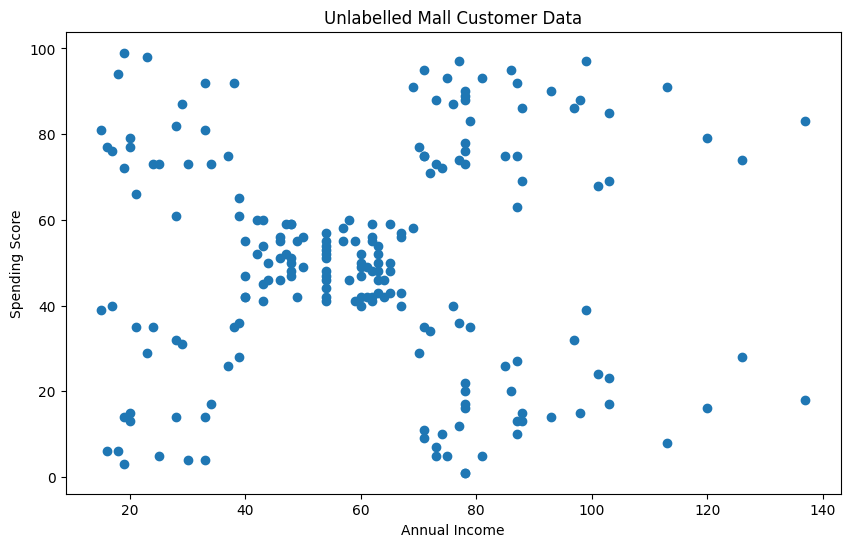

In [35]:
plt.figure(figsize=(10,6))
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Unlabelled Mall Customer Data');

In [36]:
X = df.iloc[:, [3,4]].values

clustering_score = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(X)
    clustering_score.append(kmeans.inertia_) # inertia_ = Sum of squared distances of samples to their closest cluster center.
    

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

In [37]:
kmeans= KMeans(n_clusters = 5, random_state = 42)
kmeans.fit(X)
pred = kmeans.predict(X)
df['Cluster'] = pd.DataFrame(pred, columns=['cluster'] )

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



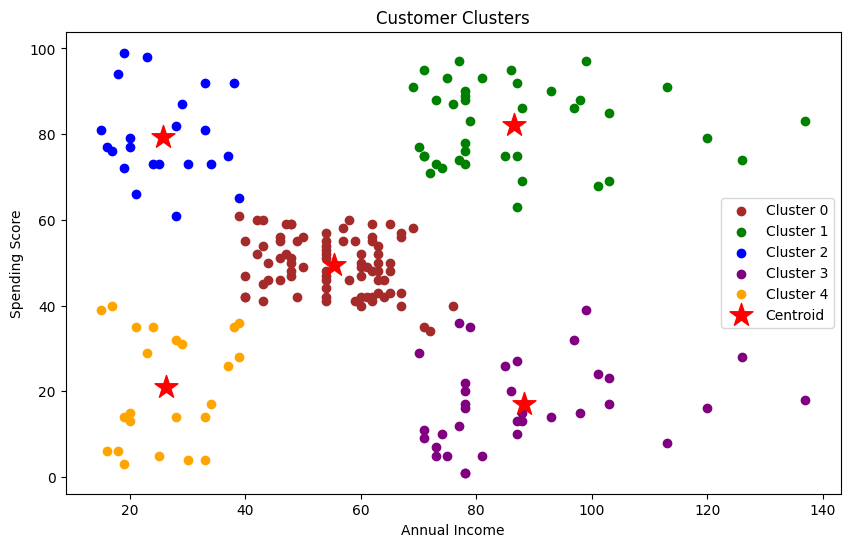

In [38]:
plt.figure(figsize=(10,6))
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c = 'brown', label = 'Cluster 0')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c = 'green', label = 'Cluster 1')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(X[pred == 3, 0], X[pred == 3, 1], c = 'purple', label = 'Cluster 3')
plt.scatter(X[pred == 4, 0], X[pred == 4, 1], c = 'orange', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],s = 300, c = 'red', label = 'Centroid', marker='*')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.title('Customer Clusters');

The code below provides an interactive way to explore how different cluster counts affect the grouping of data points in the KMeans algorithm.

In [39]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from ipywidgets import interact, IntSlider

# Generate random data
df = pd.read_csv('https://raw.githubusercontent.com/satishgunjal/datasets/master/Mall_Customers.csv')
X = df.iloc[:, [3,4]].values
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)
predict = kmeans.fit_predict(X)

def kmeans_interactive_X(num_clusters):
    # Fit KMeans model
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    return X[:,0]

def kmeans_interactive_Y(num_clusters):
    # Fit KMeans model
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    return X[:,1]

def cluster_centers_X(num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    return kmeans.cluster_centers_[:, 0]

def cluster_centers_Y(num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    return kmeans.cluster_centers_[:, 1]
    
def predict(num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    return kmeans.fit_predict(X)

fig = go.Figure()

fig.add_trace(go.Scatter(x=X[:, 0], y=X[:, 1], mode='markers', marker=dict(color=kmeans.labels_, size=10, opacity=0.7), name = 'predicted label'))
fig.add_trace(go.Scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], mode='markers', marker=dict(color='red', size=12, symbol='star'), name='Centroids'))
fig.update_layout(title=dict(text='KMeans Clustering with different number clusters', x=0.5, xanchor='center'), xaxis_title='Annual Income', yaxis_title='Spending Score', width=800,  # Set the width of the figure
    height=600)

fig.update_layout(sliders=[
    {
        'steps': [
            {
                'method': 'animate',
                'label': str(components),
                'args': [
                    [str(components)], 
                    {
                        'mode': 'immediate',
                        'frame': {'duration': 500, 'redraw': True},
                        'transition': {'duration': 300}
                    }
                ]
            }
            for components in range(2, 7)
        ],
        'currentvalue': {'prefix': 'Number of Clusters: '}
    }
])

frames = [go.Frame(data=[
        go.Scatter(
            x=kmeans_interactive_X(components), 
            y=kmeans_interactive_Y(components), 
            mode='markers', 
            marker=dict(color=predict(components), size=10, opacity=0.7),
            
        ),
        go.Scatter(
            x=cluster_centers_X(components), 
            y=cluster_centers_Y(components), 
            name = 'Centroids',
            mode='markers', 
            marker=dict(color='red', size=12, symbol='star'),
        )
    ], name=str(components)) for components in range(2, 7)]

fig.frames = frames
fig.show()

## K-means on MNIST

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

%config InlineBackend.figure_format = 'svg'

X, y = fetch_openml('mnist_784', return_X_y=True)
X = X.astype(float).values / 255
y = y.astype(int).values

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning:

The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.



### Accelerating K-Means: Mini-Batch Approach

The K-Means algorithm operates in $O(n)$ time, considering $K$ and the dimension of the feature space as constants. To speed up the algorithm, the concept of mini-batch K-means is introduced. Instead of processing the entire sample at once, each iteration randomly selects a subsample (mini-batch). This approach proves efficient, especially with large initial samples, where the switch to batch processing significantly accelerates the algorithm without a substantial loss of quality.

Apply mini-batch K-means:

In [41]:
from sklearn.cluster import MiniBatchKMeans
kmeans_mini = MiniBatchKMeans(n_clusters=10, n_init=10)
%time kmeans_mini.fit(X)
print("Intertia:", kmeans_mini.inertia_)
print("Class labels:", kmeans_mini.labels_)

Wall time: 3 s
Intertia: 2760058.6036310326
Class labels: [1 9 0 ... 8 8 5]


Calculate silhouette score:

In [42]:
from sklearn.metrics import silhouette_score
%time silhouette_score(X, kmeans_mini.labels_, metric='euclidean')

Wall time: 3min 29s


0.05540739746798356

Now plot the cluster centers:

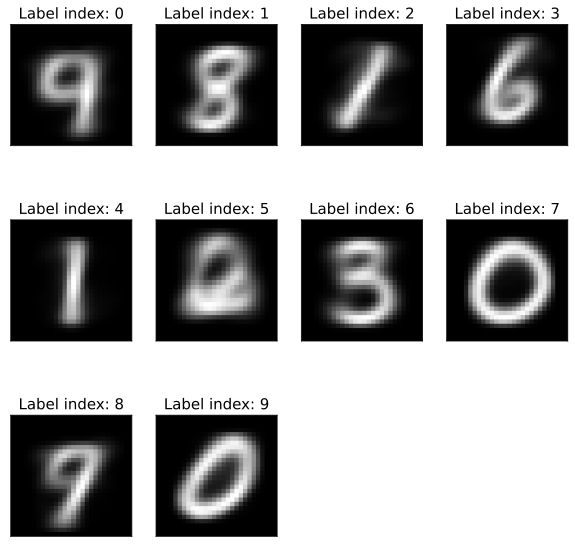

In [43]:
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(3, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(kmeans_mini.cluster_centers_[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label index: {i}", size=15)

Can you guess who is who here?

Now take the true K-means.

In [44]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, n_init=10)
%time kmeans.fit(X)
print("Intertia:", kmeans.inertia_)
print("Class labels:", kmeans.labels_)

Wall time: 1min 24s
Intertia: 2744056.0051735775
Class labels: [2 6 8 ... 1 5 7]


Silhouette score of K-means:

::::{important}
See {doc}`Clustering Metrics <../clustering_metrics.html>` for information on Silhouette score
::::

In [45]:
from sklearn.metrics import silhouette_score
%time silhouette_score(X, kmeans.labels_, metric='euclidean')

Wall time: 3min 34s


0.05869272931860956

Once again plot the centers of clusters:

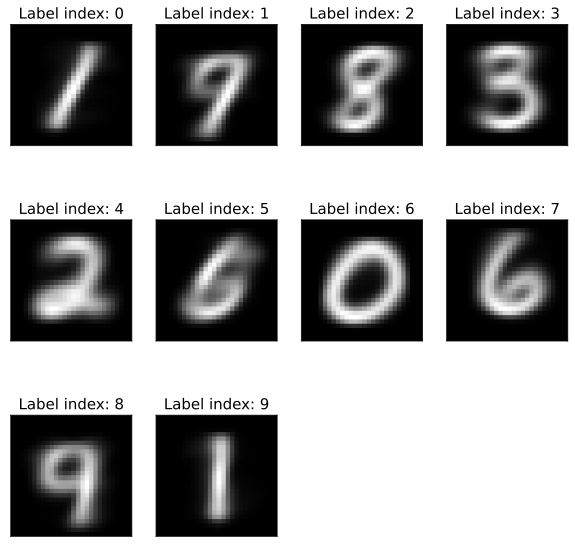

In [46]:
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(3, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(kmeans.cluster_centers_[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label index: {i}", size=15)

<div style="display:none" id="q_diff_mini_k_means">W3sicXVlc3Rpb24iOiAiSG93IGRvZXMgdGhlIE1pbmktQmF0Y2ggSy1NZWFucyBhbGdvcml0aG0gZGlmZmVyIGZyb20gdGhlIHN0YW5kYXJkIEstTWVhbnM/IiwgInR5cGUiOiAibWFueV9jaG9pY2UiLCAiYW5zd2VycyI6IFt7ImFuc3dlciI6ICIgRmFzdGVyIGNvbnZlcmdlbmNlIiwgImNvcnJlY3QiOiB0cnVlLCAiZmVlZGJhY2siOiAiQ29ycmVjdCEgTWluaS1CYXRjaCBLLU1lYW5zIGlzIGRlc2lnbmVkIGZvciBmYXN0ZXIgY29udmVyZ2VuY2UgYnkgcHJvY2Vzc2luZyByYW5kb20gc3Vic2V0cy4ifSwgeyJhbnN3ZXIiOiAiTW9yZSBhY2N1cmF0ZSByZXN1bHRzIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIkluY29ycmVjdC4gVGhlIGFjY3VyYWN5IG1heSBiZSBjb21wcm9taXNlZCBkdWUgdG8gdGhlIHVzZSBvZiBhIHN1YnNldCBvZiBkYXRhIHBvaW50cy4ifSwgeyJhbnN3ZXIiOiAiUmVkdWNlZCBjb21wdXRhdGlvbmFsIGNvc3QiLCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICJDb3JyZWN0ISBNaW5pLUJhdGNoIEstTWVhbnMgdXNlcyByYW5kb20gc3Vic2V0cywgbWFraW5nIGl0IGNvbXB1dGF0aW9uYWxseSBtb3JlIGVmZmljaWVudC4ifSwgeyJhbnN3ZXIiOiAiUmVkdWNlZCBtZW1vcnkgcmVxdWlyZW1lbnRzIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIkluY29ycmVjdC4gSXQgbWF5IHVzZSBsZXNzIG1lbW9yeSwgYnV0IHRoaXMgaXMgbm90IHRoZSBwcmltYXJ5IGRpc3RpbmN0aW9uLiJ9XX1d</div>

In [47]:
display_quiz("#q_diff_mini_k_means")

<IPython.core.display.Javascript object>

<div style="display:none" id="q_ex3">W3sicXVlc3Rpb24iOiAiSWYgd2UgY2hvb3NlIHRoZSBudW1iZXIgb2YgY2x1c3RlcnMgZXF1YWwgdG8gdGhlIG51bWJlciBvZiBkYXRhIHBvaW50cywgaS5lLiwgJEsgPSBuJCwgYW5kIGFzc3VtZSB0aGUgc3RhcnRpbmcgY2x1c3RlciBjZW50ZXJzIGFyZSB0aGUgc2FtZSBhcyB0aGUgZGF0YSBwb2ludHMsIHdoYXQgd2lsbCBiZSB0aGUgZGlzdG9ydGlvbiBvZiB0aGUgZGF0YXNldCBhdCBjb252ZXJnZW5jZT8iLCAidHlwZSI6ICJtdWx0aXBsZV9jaG9pY2UiLCAiYW5zd2VycyI6IFt7ImFuc3dlciI6ICIkMCQiLCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICJDb3JyZWN0ISJ9LCB7ImFuc3dlciI6ICIkbiQiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiSW5jb3JyZWN0LiJ9LCB7ImFuc3dlciI6ICIkMSQiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiSW5jb3JyZWN0LiJ9LCB7ImFuc3dlciI6ICIkbi0xJCIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJJbmNvcnJlY3QuIn1dfV0=</div>

In [48]:
display_quiz("#q_ex3")

<IPython.core.display.Javascript object>

Resources:

* [ML Handbook](https://education.yandex.ru/handbook/ml/article/beta-klasterizaciya#metod-k-srednih)

* Skoltech [lecture](https://github.com/adasegroup/ML2023_lectures/tree/main/lecture16) on clusterizaion

* Kaggle [Tutorial: K-Means Clustering](https://www.kaggle.com/code/satishgunjal/tutorial-k-means-clustering#Index)